<a href="https://colab.research.google.com/github/gvtsch/Recurrent_Neural_Networks/blob/main/Spring_mass_damper_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic System using Recurrent Neural Networks (RNN)

## Spring-Mass-System
In this notebook/example i am going to model a spring-mass-damper system.


<img src=https://www.researchgate.net/profile/Erkinjon-Karimov/publication/309197004/figure/download/fig1/AS:419519198711808@1477032579047/Mass-spring-damper-system.png width=30%>


The Spring-Mass-System is a comparatively simple physical model, which can be represented by a second order differential equation:

\begin{equation}
F = m\ddot{x} + k_d \dot{x} + k_s x
\end{equation}

* $x$ - Distance
* $m$ - Mass
* $k_d$ - Damping constant
* $k_s$ - Spring constant

The model also can be displayed in state-space form:

\begin{equation}
\begin{bmatrix}
  \dot{x}^{(1)} \\
  \dot{x}^{(2)}
\end{bmatrix}
=
\begin{bmatrix}
  & 0 & 1 \\
  & -\dfrac{k_s}{m} & -\dfrac{k_d}{m}
\end{bmatrix}
\begin{bmatrix}
  x^{(1)} \\
  x^{(2)}
\end{bmatrix}
+
\begin{bmatrix}
  0 \\
  \dfrac{1}{m}
\end{bmatrix}
\mathbf{F}
\end{equation}

\begin{equation}
\mathbf{y} = \begin{bmatrix}1 & 0\end{bmatrix} \mathbf{x}
\end{equation}

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define above matrices
A = np.matrix([[0, 1], [-0.1, -0.05]])
B = np.matrix([[0], [1]])
C = np.matrix([[1, 0]])

(matrix([[ 0.  ,  1.  ],
         [-0.1 , -0.05]]), matrix([[0],
         [1]]), matrix([[1, 0]]))

In [10]:
np.random.seed(42)

In [18]:
# Number of samples and sample-time / simulation-time
sampling = 0.5
sampling_time = 300

In [21]:
from numpy.linalg import inv

def simulate(A, B, C, initial_state, input_sequence, time_steps, sampling_period):
  """
  Simulates the state-space model using backward Euler method

  Inputs:
    A, B, C - Continuous time system matrices
    initial_state - System's initial state
    input_stat - 
    time_steps - Number of simulation time steps
    sampling_periods - The sampling period for backward Euler discretization

  Returns:
    Xd - State sequence
    Yd - Output sequence
  """
  I = np.identity(A.shape[0]) # Identity matrix
  Ad = inv(I - sampling_period * A)
  Bd = Ad * sampling_period * B
  Xd = np.zeros(shape=(A.shape[0], time_steps+1))
  Yd = np.zeros(shape=(C.shape[0], time_steps+1))

  for i in range(0, time_steps):
    if i == 0:
      Xd[:, [i]] = initial_state
      Yd[:, [i]] = C * initial_state
      x = Ad * initial_state + Bd * input_sequence[i]
    else:
      Xd[:, [i]] = x
      Yd[:, [i]] = C * x
      x = Ad * x + Bd * input_sequence[i]
  Xd[:, [-1]] = x
  Yd[:, [-1]] = C * x
  return Xd, Yd

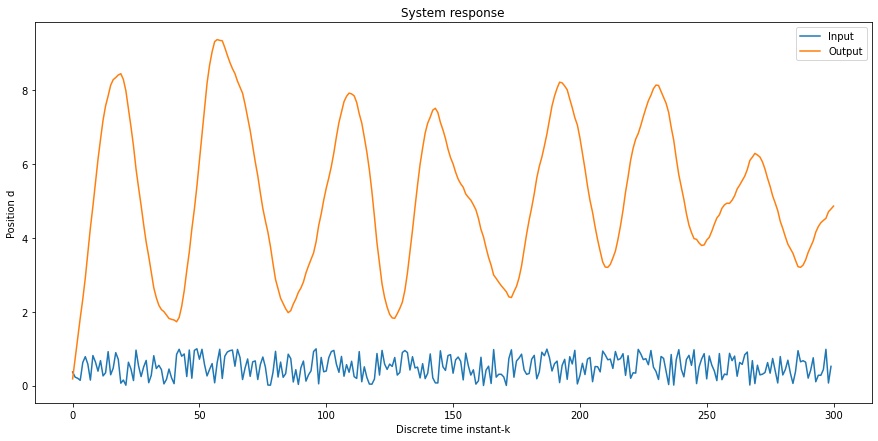

In [51]:
# Input sequence
# input_seq = np.ones(sampling_time) # Step function
input_seq = np.random.rand(sampling_time, 1)
x_0 = np.random.rand(2, 1)

state, output = simulate(A, B, C, x_0, input_seq, sampling_time, sampling)

plt.figure(figsize=(15, 7))
plt.plot(input_seq)
plt.plot(output[0, :])
plt.xlabel("Discrete time instant-k")
plt.ylabel("Position d")
plt.title("System response")
plt.legend(["Input","Output"])

In [43]:
x_0, input_seq.shape

(array([[0.61825477],
        [0.36891364]]), (300, 1))